In [0]:
import numpy as np
import math
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [0]:
# reading the dataset file
file = open('/content/drive/My Drive/Cyber Project/final_dataset.json')
json1 = json.load(file)

In [0]:
# some salaries have null/improper values, so filter them out
json1 = list(filter(lambda x: x['avgSalary'], json1))

In [0]:
# taking care of outliers
# some candidates receive ridiculously high salary for their level of exp

json1 = list(filter(lambda x: x['avgSalary'] < 3500000, json1))

In [0]:
# some formatting
x = np.array([list(map(lambda x: x['avgExp'], json1))])
y = np.array([list(map(lambda x: x['avgSalary'], json1))])

x = np.transpose(x)
y = np.transpose(y)
# x = list(map(lambda x: x['avgExp'], json1))
# y = list(map(lambda x: x['avgSalary'], json1))

In [10]:
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
rmse=math.sqrt(rmse)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)




Slope: [[132225.89775282]]
Intercept: [142689.49555097]
Root mean squared error:  514802.9173593704
R2 score:  0.4654570948268447


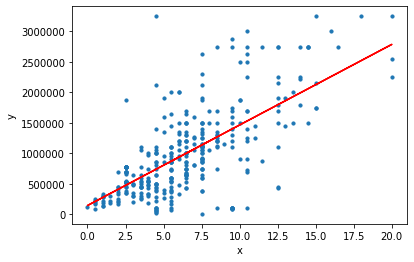

In [11]:
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

# New Section

In [14]:
exp = 2
salary = 132225.89775282 * exp + 142689.49555097

print ('salary is: ' + str(salary))


salary is: 407141.29105660995


In [15]:
df = pd.read_json('/content/drive/My Drive/Cyber Project/final_dataset.json')
margin = 100000

df.query('avgSalary < ' + str(salary + margin) + ' & avgSalary > ' +str(salary - margin))

,desig,exp,loc,org,salary,skillset,url,lowerExp,higherExp,id,location,lowerSalary,higherSalary,avgSalary,avgExp
2,Cyber Security Trainer | Jaipur,1-3 yrs,Jaipur,M/s Fast and Furious Consulting,"4,00,000 - 5,00,000 PA.","Cyber Security, Education, security consultant...",https://www.naukri.com/job-listings-Cyber-Secu...,1,3,6,jaipur,400000,500000.0,450000.0,2.0
12,Information Security Analyst,1-4 yrs,Mumbai(Sakinaka),Optum Global Solutions (India) Private Limited,"4,00,000 - 6,00,000 PA.","PCI DSS, Application Security, Cisa, Cobit, Pe...",https://www.naukri.com/job-listings-Informatio...,1,4,34,mumbai,400000,600000.0,500000.0,2.5
13,Cyber Security Analyst (hiring For All Over In...,0-5 yrs,"Delhi NCR, Chennai, Pan India",Mecproud Engineering Services (Opc) Private Li...,"2,00,000 - 7,00,000 PA. As per company standa...","Security Analysis, Malware Analysis, Cyber Sec...",https://www.naukri.com/job-listings-Cyber-Secu...,0,5,43,NaN,200000,700000.0,450000.0,2.5
22,Senior Network Engineer /only Male /experience...,3-8 yrs,Mumbai(Lower Parel),Kaizen Technology,"3,00,000 - 4,75,000 PA.","Fortigate, Network Engineering, Sonicwall, Cyb...",https://www.naukri.com/job-listings-Senior-Net...,3,8,71,mumbai,300000,475000.0,387500.0,5.5
25,Senior Sales Executive,3-6 yrs,"Mumbai(Fort), Mumbai Suburbs, Navi Mumbai",ESSEN VISION SOFTWARE PVT LTD,"3,00,000 - 6,00,000 PA.","Sales Initiatives, Product Presentation, Busin...",https://www.naukri.com/job-listings-Senior-Sal...,3,6,98,mumbai,300000,600000.0,450000.0,4.5
26,Senior Marketing Executive,3-8 yrs,"Mumbai(Fort), Mumbai Suburbs, Navi Mumbai",ESSEN VISION SOFTWARE PVT LTD,"3,00,000 - 6,00,000 PA.","Business Growth, Events, Product Positioning, ...",https://www.naukri.com/job-listings-Senior-Mar...,3,8,99,mumbai,300000,600000.0,450000.0,5.5
38,IT Pre-sales - AM / Manager,2-7 yrs,Delhi NCR(Nehru Place),B4S Solutions Pvt Ltd,"3,00,000 - 7,00,000 PA.","cisco solution sales, storage solution, it sec...",https://www.naukri.com/job-listings-IT-Pre-sal...,2,7,140,NaN,300000,700000.0,500000.0,4.5
39,AM / Manager - IT Sales,2-7 yrs,Delhi NCR(Nehru Place),B4S Solutions Pvt Ltd,"3,00,000 - 7,00,000 PA.","cisco solution sales, network solution sales, ...",https://www.naukri.com/job-listings-AM-Manager...,2,7,141,NaN,300000,700000.0,500000.0,4.5
53,Openings For Vulnerability Risk & Impact Asses...,2-4 yrs,Bengaluru,Faxhion Technologies Private Limited,"4,00,000 - 6,00,000 PA.","Embedded C, Java, C++, Cyber Security, Network...",https://www.naukri.com/job-listings-Openings-F...,2,4,172,bengaluru,400000,600000.0,500000.0,3.0
86,Required Senior Application Security Analysts ...,2-4 yrs,"Chennai, Hyderabad, Pune",Faxhion Technologies Private Limited,"4,00,000 - 6,00,000 PA.","Embedded C, Java, C++, Cyber Security, Network...",https://www.naukri.com/job-listings-Required-S...,2,4,285,NaN,400000,600000.0,500000.0,3.0
